In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stocknews/RedditNews.csv
/kaggle/input/stocknews/upload_DJIA_table.csv
/kaggle/input/stocknews/Combined_News_DJIA.csv


In [2]:
#read data
data = pd.read_csv('/kaggle/input/stocknews/Combined_News_DJIA.csv')
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [3]:
#step1: data exploration
#1- data quantity: dataset<100000 
data.shape

(1989, 27)

In [4]:
#2-unstructured data --> text
data.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [5]:
#3-statistics of quantitative data
# we have mean =53% 
data.describe()

,Label
count,1989.000000
mean,0.535445
std,0.498867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


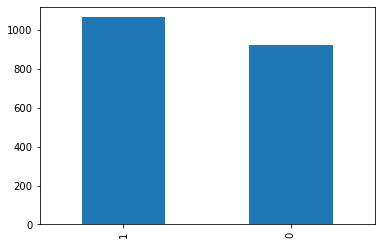

In [6]:
#5-binary classification : Label (1,0)
#"1" when DJIA Adj Close value rose or stayed as the same;
#"0" when DJIA Adj Close value decreased.

data['Label'].value_counts().plot.bar()

#conclusion--> text classification: we use first Naive Bayes classification

In [7]:
#step2: text classification with Naive Bayes
#split our dataset for ML task
train = data[data['Date'] <='2014-12-31']
test = data[data['Date'] >='2015-01-02']

print (train.shape[0],test.shape[0])

1611 378


In [8]:
#use a global context for all tops

train['Global_context']=train.iloc[:,2:].apply(lambda r: ''.join(str(r.values)), axis=1)
test ['Global_context']=test.iloc[:,2:].apply(lambda r: ''.join(str(r.values)), axis=1)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
train=train.drop([ 'Date', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],axis=1)
train

,Label,Global_context
0,0,"['b""Georgia \'downs two Russian warplanes\' as..."
1,1,"[""b'Why wont America and Nato help us? If they..."
2,0,"[""b'Remember that adorable 9-year-old who sang..."
3,0,"[""b' U.S. refuses Israel weapons to attack Ira..."
4,1,"[""b'All the experts admit that we should legal..."
...,...,...
1606,1,['Death toll among Qatars 2022 World Cup worke...
1607,1,['Saudis are eagerly awaiting the approval of ...
1608,0,['Solar Power Storage Prices Drop 25% In Germa...
1609,0,['China businessman jailed for 13 years for bu...


In [10]:
test=test.drop([ 'Date', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],axis=1)
test

,Label,Global_context
1611,1,['Most cases of cancer are the result of sheer...
1612,0,['Moscow-&gt;Beijing high speed train will red...
1613,0,"['US oil falls below $50 a barrel'\n ""Toyota g..."
1614,1,"[""'Shots fired' at French magazine HQ""\n '90% ..."
1615,1,['New Charlie Hebdo issue to come out next wee...
...,...,...
1984,0,['Barclays and RBS shares suspended from tradi...
1985,1,"['2,500 Scientists To Australia: If You Want T..."
1986,1,['Explosion At Airport In Istanbul'\n 'Yemeni ...
1987,1,['Jamaica proposes marijuana dispensers for to...


In [11]:
X_train=train['Global_context']
X_test=test['Global_context']
y_train=train['Label']
y_test=test['Label']

In [12]:
#Convert Global_context into word count vectors
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [13]:
#count frequency of words in Global_context
words_freq = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
words = pd.DataFrame(words_freq.sum()).sort_values(0, ascending=False)

In [14]:
print(words)

              0
b         11978
s          8656
israel     1946
new        1870
says       1840
...         ...
koruna        1
korma         1
kordofan      1
koranic       1
zygi          1

[31195 rows x 1 columns]


In [15]:
#fit a naive_bayes model and make predictions

from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [16]:
#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix,classification_report
#print('Accuracy score: ', accuracy_score(y_test, predictions))
#print('Precision score: ', precision_score(y_test, predictions))
#print('Recall score: ', recall_score(y_test, predictions))
#print('F-score: ', f1_score(y_test, predictions))
print ('\n confusion matrix:\n',confusion_matrix(y_test, predictions))
print ('\n clasification report:\n', classification_report(y_test,predictions))


 confusion matrix:
 [[ 48 138]
 [ 53 139]]

 clasification report:
               precision    recall  f1-score   support

           0       0.48      0.26      0.33       186
           1       0.50      0.72      0.59       192

    accuracy                           0.49       378
   macro avg       0.49      0.49      0.46       378
weighted avg       0.49      0.49      0.47       378



In [17]:
#testing our predictions
testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append('1')
    else:
        testing_predictions.append('0')
results = pd.DataFrame({'Labels': list(y_test), 'prediction': testing_predictions, 'tops':list(X_test)})
results.replace(to_replace=0, value=0, inplace=True)
results.replace(to_replace=1, value=1, inplace=True)

In [18]:
results 

,Labels,prediction,tops
0,1,0,['Most cases of cancer are the result of sheer...
1,0,1,['Moscow-&gt;Beijing high speed train will red...
2,0,0,"['US oil falls below $50 a barrel'\n ""Toyota g..."
3,1,0,"[""'Shots fired' at French magazine HQ""\n '90% ..."
4,1,0,['New Charlie Hebdo issue to come out next wee...
...,...,...,...
373,0,1,['Barclays and RBS shares suspended from tradi...
374,1,1,"['2,500 Scientists To Australia: If You Want T..."
375,1,1,['Explosion At Airport In Istanbul'\n 'Yemeni ...
376,1,0,['Jamaica proposes marijuana dispensers for to...


In [19]:
# we should choose an another ML model